In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import evaltools as et, viz_tools, places
import cmocean as cmo
import datetime as dt
import netCDF4 as nc
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
import cmocean
import f90nml
import os
import pickle
import xarray as xr

%matplotlib inline

In [2]:
places.PLACES.keys()

dict_keys(['Campbell River', 'Cherry Point', 'Friday Harbor', 'Halfmoon Bay', 'Nanaimo', 'Neah Bay', 'New Westminster', 'Patricia Bay', 'Point Atkinson', 'Port Renfrew', 'Sandy Cove', 'Squamish', 'Victoria', 'Woodwards Landing', 'Boundary Bay', 'Calamity Point', 'Vancouver Harbour', 'Port Moody', 'Indian Arm Head', '2nd Narrows Rail Bridge', 'Tsawwassen', 'Duke Pt.', 'Horseshoe Bay', 'Departure Bay', 'Swartz Bay', 'Vancouver', 'Hope', 'British Columbia', 'Washington State', 'Pacific Ocean', 'Juan de Fuca Strait', 'Puget Sound', 'Strait of Georgia', 'Central SJDF', 'Baynes Sound', 'S3', 'QU39', 'SJDF', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7', 'Cluster_8', 'Cluster_9', 'Central node', 'Delta BBL node', 'Delta DDL node', 'East node', 'Ballenas Islands', 'Discovery Island', 'Entrance Island', 'Race Rocks', 'Sand Heads', 'Saturna Island', 'Sisters Islet', 'Esquimalt', 'Pam Rocks', 'Halibut Bank', 'Sentry Shoal', 'Egmont', 'Comox Airport', 'S

In [3]:
places.PLACES['Central SJDF']

{'lon lat': (-123.9534, 48.281677),
 'NEMO grid ji': (315, 95),
 'GEM2.5 grid ji': (101, 124)}

In [4]:
places.PLACES['S3']

{'lon lat': (-123.558, 49.125),
 'NEMO grid ji': (450, 258),
 'GEM2.5 grid ji': (138, 144)}

In [5]:
pl=places.PLACES

In [6]:
# path to model files:
PATH= '/results2/SalishSea/nowcast-green.201905/'
start = dt.datetime(2015,1,1)
end = dt.datetime(2019,1,1)
#end = dt.datetime(2019,6,1)
namfmt='nowcast'

In [7]:
flist=et.index_model_files(start,end,PATH,namfmt,flen=1,ftype='ptrc_T',tres=24)

In [8]:
int(365/10)

36

In [9]:
pl.keys()

dict_keys(['Campbell River', 'Cherry Point', 'Friday Harbor', 'Halfmoon Bay', 'Nanaimo', 'Neah Bay', 'New Westminster', 'Patricia Bay', 'Point Atkinson', 'Port Renfrew', 'Sandy Cove', 'Squamish', 'Victoria', 'Woodwards Landing', 'Boundary Bay', 'Calamity Point', 'Vancouver Harbour', 'Port Moody', 'Indian Arm Head', '2nd Narrows Rail Bridge', 'Tsawwassen', 'Duke Pt.', 'Horseshoe Bay', 'Departure Bay', 'Swartz Bay', 'Vancouver', 'Hope', 'British Columbia', 'Washington State', 'Pacific Ocean', 'Juan de Fuca Strait', 'Puget Sound', 'Strait of Georgia', 'Central SJDF', 'Baynes Sound', 'S3', 'QU39', 'SJDF', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5', 'Cluster_6', 'Cluster_7', 'Cluster_8', 'Cluster_9', 'Central node', 'Delta BBL node', 'Delta DDL node', 'East node', 'Ballenas Islands', 'Discovery Island', 'Entrance Island', 'Race Rocks', 'Sand Heads', 'Saturna Island', 'Sisters Islet', 'Esquimalt', 'Pam Rocks', 'Halibut Bank', 'Sentry Shoal', 'Egmont', 'Comox Airport', 'S

In [10]:
pl['Cluster_5']

{'NEMO grid ji': (344, 271), 'lon lat': (48.735, -123.135), 'Vector Stn': '57'}

In [11]:
mesh=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

In [96]:
mesh.variables['e3t_1d'][:]

masked_array(data=[[ 1.00000115,  1.00000501,  1.00001253,  1.00002718,
                     1.0000557 ,  1.00011125,  1.00021946,  1.0004302 ,
                     1.00084067,  1.00164012,  1.0031971 ,  1.00622914,
                     1.01213271,  1.02362358,  1.04597551,  1.08940061,
                     1.17356428,  1.33592899,  1.64636781,  2.22990285,
                     3.29248567,  5.11998508,  7.97451506, 11.8252972 ,
                    16.10792044, 19.95870258, 22.81323256, 24.64073198,
                    25.70331479, 26.28684983, 26.59728865, 26.75965336,
                    26.84381704, 26.88724213, 26.90959407, 26.92108493,
                    26.9269885 , 26.93002054, 26.93157752, 26.93237697]],
             mask=False,
       fill_value=1e+20)

In [97]:
np.sum(mesh.variables['e3t_1d'][:])

454.9323447653587

(0.0, 397.0, 0.0, 897.0)

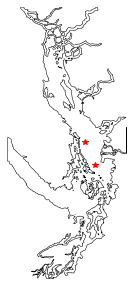

In [87]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.contour(mesh.variables['tmask'][0,0,:,:],[.5,],
                    colors='black',zorder=2,linewidths=.5)
j,i=pl['S3']['NEMO grid ji']
ax.plot(i,j,'r*')
j,i=pl['Cluster_3']['NEMO grid ji']
ax.plot(i,j,'r*')
ax.set_aspect(1)
ax.axis('off')

(0.0, 397.0, 0.0, 897.0)

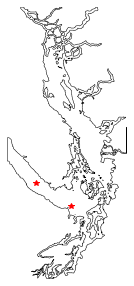

In [89]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.contour(mesh.variables['tmask'][0,0,:,:],[.5,],
                    colors='black',zorder=2,linewidths=.5)
j,i=pl['Cluster_1']['NEMO grid ji']
ax.plot(i,j,'r*')
j,i=pl['Central SJDF']['NEMO grid ji']
ax.plot(i,j,'r*')
ax.set_aspect(1)
ax.axis('off')

In [13]:
mesh.variables['e3t_0'][0,0:10,j,i]

masked_array(data=[1.00000115, 1.00000501, 1.00001253, 1.00002718,
                   1.0000557 , 1.00011125, 1.00021946, 1.0004302 ,
                   1.00084067, 1.00164012],
             mask=False,
       fill_value=1e+20)

In [14]:
flist.loc[0:5,['paths']].values[:]

array([['/results2/SalishSea/nowcast-green.201905/01jan15/SalishSea_1d_20150101_20150101_ptrc_T.nc'],
       ['/results2/SalishSea/nowcast-green.201905/02jan15/SalishSea_1d_20150102_20150102_ptrc_T.nc'],
       ['/results2/SalishSea/nowcast-green.201905/03jan15/SalishSea_1d_20150103_20150103_ptrc_T.nc'],
       ['/results2/SalishSea/nowcast-green.201905/04jan15/SalishSea_1d_20150104_20150104_ptrc_T.nc'],
       ['/results2/SalishSea/nowcast-green.201905/05jan15/SalishSea_1d_20150105_20150105_ptrc_T.nc'],
       ['/results2/SalishSea/nowcast-green.201905/06jan15/SalishSea_1d_20150106_20150106_ptrc_T.nc']],
      dtype=object)

In [15]:
f=xr.open_mfdataset(flist.loc[0:29,['paths']].values[:].flatten())

In [16]:
test=np.mean(f['flagellates'][:,:10,j,i],1)

In [17]:
test.values

array([0.19353463, 0.19585939, 0.17772563, 0.17018925, 0.15057345,
       0.14145637, 0.14665715, 0.14985387, 0.16430801, 0.19850898,
       0.22536305, 0.21813767, 0.22096321, 0.22419822, 0.25851965,
       0.23370525, 0.24639848, 0.23486075, 0.23435584, 0.23521712,
       0.23471816, 0.25163656, 0.24313378, 0.22408512, 0.23028934,
       0.25350475, 0.26361176, 0.2547002 , 0.2741353 , 0.2891082 ],
      dtype=float32)

In [18]:
f.close()

In [19]:
# upper 10 m average at each location
if False:
    dd=29
    chls={'S3':list(),'Central SJDF':list(),'Cluster_1':list(),'Cluster_3':list()}
    for ind in range(0,int(np.ceil(len(flist)/dd))):
        start=ind*dd
        end=min((ind+1)*dd,len(flist))
        print(start,end)
        with xr.open_mfdataset(flist.iloc[start:end]['paths']) as f:
            for ipl in chls.keys():
                j,i=pl[ipl]['NEMO grid ji']
                phy=np.mean(f['diatoms'][:,:10,j,i]+f['ciliates'][:,:10,j,i]+f['flagellates'][:,:10,j,i],1)
                chls[ipl].append(phy.values)
    for ipl in chls.keys():
        chls[ipl]=1.8*np.concatenate(chls[ipl])
    with open( 'chls.pkl', "wb" ) as pkf:
        pickle.dump(chls,pkf)
else:
    with open( 'chls.pkl', "rb" ) as pkf:
        chls=pickle.load(chls,pkf)

0 29
29 58
58 87
87 116
116 145
145 174
174 203
203 232
232 261
261 290
290 319
319 348
348 377
377 406
406 435
435 464
464 493
493 522
522 551
551 580
580 609
609 638
638 667
667 696
696 725
725 754
754 783
783 812
812 841
841 870
870 899
899 928
928 957
957 986
986 1015
1015 1044
1044 1073
1073 1102
1102 1131
1131 1160
1160 1189
1189 1218
1218 1247
1247 1276
1276 1305
1305 1334
1334 1363
1363 1392
1392 1421
1421 1450
1450 1461


In [52]:
dts=np.array([ii for ii in flist.t_0])
yds=np.array(et.datetimeToYD(flist.t_0))
yrs=np.array([ii.year for ii in flist.t_0])

In [59]:
cols=plt.get_cmap('Accent',6)

Text(0, 0.5, 'Chl (mg/m$^3$)')

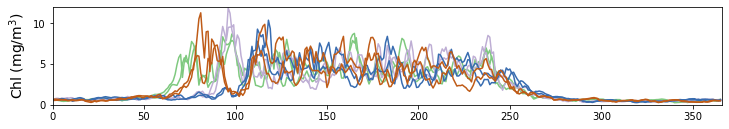

In [90]:
fig,ax=plt.subplots(1,1,figsize=(12,1.8))
for yr in np.arange(2015,2019):
    ii=yrs==yr
    ax.plot(yds[ii],chls['S3'][ii],color=cols((yr-2015)/(2019-2015)))
    ax.plot(yds[ii],chls['Cluster_3'][ii],color=cols((yr-2015)/(2019-2015)))
ax.set_xlim(0,366)
ax.set_ylim(0,12)
ax.set_ylabel('Chl (mg/m$^3$)',fontsize=14)

Text(0, 0.5, 'Chl (mg/m$^3$)')

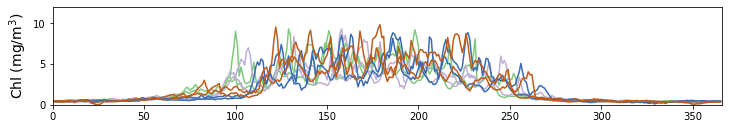

In [91]:
fig,ax=plt.subplots(1,1,figsize=(12,1.8))
for yr in np.arange(2015,2019):
    ii=yrs==yr
    ax.plot(yds[ii],chls['Central SJDF'][ii],color=cols((yr-2015)/(2019-2015)))
    ax.plot(yds[ii],chls['Cluster_1'][ii],color=cols((yr-2015)/(2019-2015)))
ax.set_xlim(0,366)
ax.set_ylim(0,12)
ax.set_ylabel('Chl (mg/m$^3$)',fontsize=14)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [47]:
cols(0/6),cols(1/6),cols(2/6),cols(3/6),cols(4/6),cols(5/6)

((0.4980392156862745, 0.788235294117647, 0.4980392156862745, 1.0),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079, 1.0),
 (1.0, 1.0, 0.6, 1.0),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725, 1.0),
 (0.7490196078431373, 0.3568627450980392, 0.09019607843137253, 1.0),
 (0.4, 0.4, 0.4, 1.0))

In [2]:
# path to model files:
PATH= '/results2/SalishSea/nowcast-green.201905/'

# start and end dates for analysis:

# number of days per model file:
flen=1

# dictionary mapping desired model variables to the file types where they are found
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T',
         'flagellates':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}

# dictionary mapping model file types to their time resolution in hours (1 is hourly files, 24 is daily)
fdict={'ptrc_T':1,'grid_T':1}

# results format
# -- nowcast: files like 01jan15/SalishSea_1h_20150101_20150101_ptrc_T.nc
# -- long: files like SalishSea_1h_20150206_20150804_ptrc_T_20150427-20150506.nc, all in one directory

# path to directory containing database: 
# obsDir='/ocean/shared/SalishSeaCastData/DFO/BOT/' #normal obs dir
obsDir='/data/eolson/MEOPAR/OBS/'            #temporary obs dir
#(dbname defaults to 'DFO_OcProfDB.sqlite')

# Where to store last pickle file:
pkldir='/data/eolson/results/MEOPAR/clusterGroups/'

### 1) load DFO data and match it to model output: don't repeat this part unless you want to look at different years (outside 2013-2016)

In [3]:
# load DFO bottle data (returns pandas dataframe)
# AbsSal is Absolute (actually reference) Salinity, and ConsT is Conservative Temperature
# N is nitrate+nitrate, Si is Silicate; Chlorophyll_Extracted; Z is depth (m); dtUTC is datetime in UTC
# excludeSaanich=True -> do not include data from Saanich Inlet
df1=et.loadDFO(basedir=obsDir,datelims=(start_date,end_date),excludeSaanich=True,)
print(len(df1))
df1.head()

7153


,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,1.9,NaN,None,None,NaN,mg/m^3,15.31,32.14,umol/L,29.227507,9.859421,1.883998,2015-02-11 11:04:07
1,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,6.6,NaN,None,None,2.57,mg/m^3,17.13,33.90,umol/L,29.484341,9.777243,6.544340,2015-02-11 11:04:07
2,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,6.7,NaN,None,None,NaN,mg/m^3,NaN,NaN,umol/L,29.484839,9.771987,6.643495,2015-02-11 11:04:07
3,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,11.0,NaN,None,None,NaN,mg/m^3,NaN,NaN,umol/L,30.144549,9.439995,10.907117,2015-02-11 11:04:07
4,2015.0,2.0,11.0,11.068611,48.300833,-124.000333,11.0,NaN,None,None,NaN,mg/m^3,20.62,37.65,umol/L,30.157913,9.433733,10.907117,2015-02-11 11:04:07


In [4]:
# match model output to observations and return both in a dataframe
# the model variables will have their original names prefixed by mod_, eg mod_vosaline
# the observation file names are unchanged. 
data=et.matchData(data=df1,filemap=filemap, fdict=fdict, mod_start=start_date, mod_end=end_date, 
                  mod_nam_fmt=namfmt, mod_basedir=PATH, mod_flen=flen,
                  meshPath='/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

(Lat,Lon)= 49.011 -125.17033333333333  not matched to domain
(Lat,Lon)= 49.02133333333333 -125.15683333333334  not matched to domain
(Lat,Lon)= 49.0305 -125.15283333333333  not matched to domain
(Lat,Lon)= 49.0415 -125.15133333333333  not matched to domain
(Lat,Lon)= 49.0425 -125.151  not matched to domain
(Lat,Lon)= 49.05233333333333 -125.143  not matched to domain
(Lat,Lon)= 49.070166666666665 -125.15616666666666  not matched to domain
(Lat,Lon)= 49.071333333333335 -125.15733333333333  not matched to domain
(Lat,Lon)= 49.083 -125.17166666666667  not matched to domain
(Lat,Lon)= 49.09283333333333 -125.19416666666666  not matched to domain
(Lat,Lon)= 49.295 -123.05466666666666  not matched to domain
(Lat,Lon)= 49.29516666666667 -123.05383333333333  not matched to domain
(Lat,Lon)= 49.29516666666667 -123.03316666666667  not matched to domain
(Lat,Lon)= 49.29533333333333 -123.0555  not matched to domain
(Lat,Lon)= 49.29783333333334 -122.98066666666666  not matched to domain
(Lat,Lon)= 49

In [5]:
#Chl:N ratio used later in plots; get value from namelist associated with model output
mod_chl_N=et.getChlNRatio(basedir=PATH,nam_fmt='nowcast')
print(mod_chl_N)

1.8


/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:123: UserWarning: No contour levels were found within the data range.
  contour_lines = axes.contour(


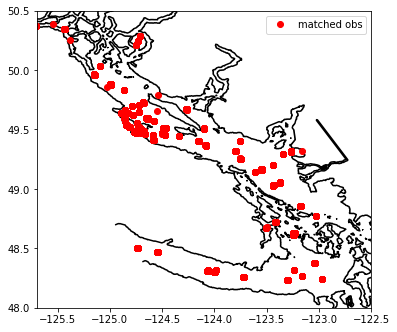

In [6]:
# plot matched data locations
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(data['Lon'], data['Lat'], 'ro',label='matched obs')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

In [7]:
# add column for day of year
data['YD']=et.datetimeToYD(data['dtUTC'])

In [8]:
data.dropna(axis=1,how='all',inplace=True)

In [9]:
def logt(x):
    return np.log10(x+.001)

In [10]:
# chlorophyll calculations
data['l10_obsChl']=logt(data['Chlorophyll_Extracted'])
data['l10_modChl']=logt(mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates']))
data['mod_Chl']=mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])
data['Chl']=data['Chlorophyll_Extracted']

### 2) add Cluster info: Also don't need to repeat this unless you want other years

In [11]:
clusterD='/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/'
cxf='Xcoords_for571_stations.pkl'
cyf='Ycoords_for571_stations.pkl'
cfile='BIO_clno_5_2015_reass.pkl' # only 2015 and 2016 overlap with hplc
cver='BIO'

In [12]:
data['Year']=[ii.year for ii in data['dtUTC']]

In [13]:
cx=pickle.load(open(clusterD+cxf, 'rb'))
cy=pickle.load(open(clusterD+cyf, 'rb'))
cf=dict()
for iyear in np.unique(data.Year):
    cf[iyear]=pickle.load(open(clusterD+cfile,'rb'))

In [14]:
def round2(num):
    return int(np.trunc((num+2)/10)*10+2)

In [15]:
data['Cluster']=np.zeros(len(data))

In [16]:
for ir, row in data.iterrows():
    ii=(cx==round2(row['i']))&(cy==round2(row['j']))
    if sum(ii)==1:
        cluster=cf[row['Year']][ii]
        data.at[ir,'Cluster']=int(cluster)

In [17]:
# number of points not assigned a cluster, total length of dataframe:
np.sum(data['Cluster']==0),len(data)

(930, 6877)

In [18]:
pickle.dump(data,open(os.path.join(pkldir,'DFODataModelClusterBIO_1905temp.pkl'),'wb'))

# Jump to here to load pandas dataframe containing DFO Obs, model values, and Cluster ID

In [3]:
data=pickle.load(open(os.path.join(pkldir,'DFODataModelClusterBIO_1905temp.pkl'),'rb'))

In [7]:
data.loc[(data.Cluster==5)&(data.mod_Chl<0)]

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Chlorophyll_Extracted,Chlorophyll_Extracted_units,...,mod_flagellates,mod_vosaline,mod_votemper,k,YD,l10_obsChl,l10_modChl,mod_Chl,Chl,Cluster


In [12]:
(np.min(data.loc[ii,['mod_Chl']].values),np.max(data.loc[ii,['mod_Chl']].values),
 np.min(data.loc[ii,['Chl']].values),np.max(data.loc[ii,['Chl']].values))


(2.7816674164071743e-08, 12.303171944618226, 0.21, 43.96)

In [13]:
(np.min(data.loc[ii,['Z']].values),np.max(data.loc[ii,['Z']].values),
 np.min(data.loc[ii,['Chl']].values),np.max(data.loc[ii,['Chl']].values))


(0.6, 49.7, 0.21, 43.96)

(array([105.,  82.,  14.,  66.,  24.,   4.,   1.,   0.,   0.,   2.]),
 array([ 0.6 ,  5.51, 10.42, 15.33, 20.24, 25.15, 30.06, 34.97, 39.88,
        44.79, 49.7 ]),
 <BarContainer object of 10 artists>)

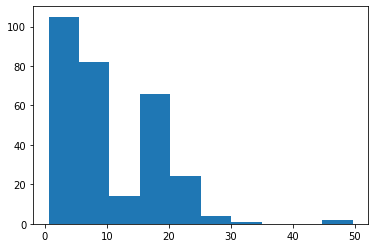

In [14]:
plt.hist(data.loc[ii,['Z']].values)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  2.,  2.,  1.,  4.,  5.,  6., 10., 23., 50., 63.,
        79., 22.,  6.,  4.,  3.,  3.,  5.,  1.,  1.,  0.,  2.]),
 array([-37.19372513, -36.2470447 , -35.30036426, -34.35368383,
        -33.4070034 , -32.46032296, -31.51364253, -30.56696209,
        -29.62028166, -28.67360122, -27.72692079, -26.78024035,
        -25.83355992, -24.88687948, -23.94019905, -22.99351862,
        -22.04683818, -21.10015775, -20.15347731, -19.20679688,
        -18.26011644, -17.31343601, -16.36675557, -15.42007514,
        -14.4733947 , -13.52671427, -12.58003384, -11.6333534 ,
        -10.68667297,  -9.73999253,  -8.7933121 ,  -7.84663166,
         -6.89995123,  -5.95327079,  -5.00659036,  -4.05990993,
         -3.11322949,  -2.16654906,  -1.21986862,  -0.27318819,
          0.67349225,   1.62017268,   2.56685312,   3.51353355,
          4.

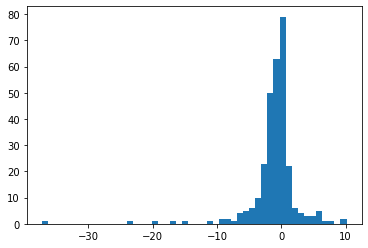

In [18]:
ii=(data.Cluster==5)&(~np.isnan(data.mod_Chl))&(~np.isnan(data.Chl))
plt.hist(data.loc[ii,['mod_Chl']].values-data.loc[ii,['Chl']].values,50)

(array([[136.,  68.,  37.,  17.,   7.,   5.,  10.,   5.,   5.,   5.,   1.,
           0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.],
        [ 68.,  84.,  52.,  27.,  19.,  12.,  12.,   3.,   5.,   3.,   2.,
           0.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   1.,   1.,
           1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   1.]]),
 array([2.78166742e-08, 8.79200027e-01, 1.75840003e+00, 2.63760003e+00,
        3.51680003e+00, 4.39600003e+00, 5.27520002e+00, 6.15440002e+00,
        7.03360002e+00, 7.91280002e+00, 8.79200002e+00, 9.67120002e+00,
        1.05504000e+01, 1.14296000e+01, 1.23088000e+01, 1.31880000e+01,
        1.40672000

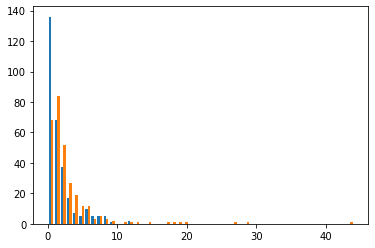

In [19]:
plt.hist(data.loc[ii,['mod_Chl','Chl']],50)

In [20]:
et.printstats(data.loc[ii,:],'Chl','mod_Chl')

  N: 298
  bias: -1.0716362509525188
  RMSE: 4.032773851267568
  WSS: 0.5227603605400591


In [19]:
data.keys()

Index(['Year', 'Month', 'Day', 'Hour', 'Lat', 'Lon', 'Pressure', 'Depth',
       'Chlorophyll_Extracted', 'Chlorophyll_Extracted_units', 'N', 'Si',
       'Silicate_units', 'AbsSal', 'ConsT', 'Z', 'dtUTC', 'j', 'i',
       'mod_nitrate', 'mod_silicon', 'mod_ammonium', 'mod_diatoms',
       'mod_ciliates', 'mod_flagellates', 'mod_vosaline', 'mod_votemper', 'k',
       'YD', 'l10_obsChl', 'l10_modChl', 'mod_Chl', 'Chl', 'Cluster'],
      dtype='object')

In [20]:
# create dictionary of dataframe views by year
datyr=dict()
yy=np.array([ii.year for ii in data['dtUTC']])
yys=np.unique(yy)
for yr in yys:
    datyr[yr]=data.loc[yy==yr]

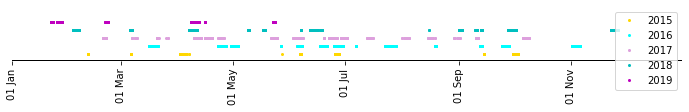

In [21]:
# plot matched data sampling times
clist=('gold','aqua','plum','c','m','r','g','b','brown','gray')
fig,axL=plt.subplots(1,1,figsize=(12,1))
for ii, yr in enumerate(yys):
    dshift=dt.datetime(yys[0],1,1)-dt.datetime(yr,1,1)
    axL.plot(datyr[yr].dtUTC+dshift,np.zeros(np.shape(datyr[yr].dtUTC))+.1*ii,'.',
             color=clist[ii],markersize=4,label=str(yr))
axL.set_yticks(());
yearsFmt = mdates.DateFormatter('%d %b')
axL.xaxis.set_major_formatter(yearsFmt)
axL.xaxis.set_ticks([dt.datetime(int(yys[0]),1,1), dt.datetime(int(yys[0]),3,1),dt.datetime(int(yys[0]),5,1),dt.datetime(int(yys[0]),7,1),
                     dt.datetime(int(yys[0]),9,1),dt.datetime(int(yys[0]),11,1),dt.datetime(int(yys[0])+1,1,1)])
for tick in axL.get_xticklabels():
        tick.set_rotation(90)
        tick.set_horizontalalignment('center')
axL.set_ylim(-.1,.1*(len(datyr.keys())+1))
axL.set_xlim(dt.datetime(yys[0],1,1),dt.datetime(yys[0],12,31))
axL.legend()
axL.set_frame_on(False)
xmin, xmax = axL.get_xaxis().get_view_interval()
ymin, ymax = axL.get_yaxis().get_view_interval()
axL.add_artist(mpl.lines.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))

#### Display stats

In [22]:
print('Chl depth<15:') 
et.printstats(data.loc[data.Z<15,:],'Chl','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[data.Cluster==icl,:],'Chl','mod_Chl')

Chl depth<15:
  N: 1128
  bias: -1.063038494482337
  RMSE: 4.2665735142910055
  WSS: 0.47133074369184613
cluster 0
  N: 61
  bias: -1.0433987600606554
  RMSE: 4.15584071944118
  WSS: 0.4331381374902409
cluster 1
  N: 48
  bias: -0.9623142875159583
  RMSE: 2.6727830440354285
  WSS: 0.6330633127363025
cluster 2
  N: 0
  bias: nan
  RMSE: nan
  WSS: nan
cluster 3
  N: 453
  bias: -1.3085037965030737
  RMSE: 4.792964263448938
  WSS: 0.43117269642958045
cluster 4
  N: 125
  bias: -0.41952574214577654
  RMSE: 3.563638557922338
  WSS: 0.5999185714810953
cluster 5
  N: 140
  bias: -1.3812470767346832
  RMSE: 5.502663737859913
  WSS: 0.49191090985246433


/home/eolson/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/eolson/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/evaltools.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  RMSE=np.sqrt(np.sum((mod-obs)**2)/N)
/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/evaltools.py:1114: RuntimeWarning: invalid value encountered in double_scalars
  WSS=1.0-np.sum((mod-obs)**2)/np.sum((np.abs(mod-obsmean)+np.abs(obs-obsmean))**2)


In [22]:
print('Chl depth<15:') 
et.printstats(data.loc[data.Z<15,:],'Chl','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z<10),:],'Chl','mod_Chl')

Chl depth<15:
  N: 1128
  bias: -1.063038494482337
  RMSE: 4.2665735142910055
  WSS: 0.47133074369184613
cluster 0
  N: 61
  bias: -1.0433987600606554
  RMSE: 4.15584071944118
  WSS: 0.4331381374902409
cluster 1
  N: 48
  bias: -0.9623142875159583
  RMSE: 2.6727830440354285
  WSS: 0.6330633127363025
cluster 2
  N: 0
  bias: nan
  RMSE: nan
  WSS: nan
cluster 3
  N: 453
  bias: -1.3085037965030737
  RMSE: 4.792964263448938
  WSS: 0.43117269642958045
cluster 4
  N: 125
  bias: -0.41952574214577654
  RMSE: 3.563638557922338
  WSS: 0.5999185714810953
cluster 5
  N: 140
  bias: -1.3812470767346832
  RMSE: 5.502663737859913
  WSS: 0.49191090985246433


/home/eolson/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/eolson/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/evaltools.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  RMSE=np.sqrt(np.sum((mod-obs)**2)/N)
/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/evaltools.py:1114: RuntimeWarning: invalid value encountered in double_scalars
  WSS=1.0-np.sum((mod-obs)**2)/np.sum((np.abs(mod-obsmean)+np.abs(obs-obsmean))**2)


### mod vs. obs plots

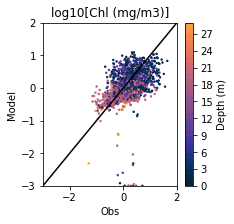

In [23]:
cm1=cmocean.cm.thermal
bounds = np.array(np.arange(0,30))
norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=200)
#pcm = ax[1].pcolormesh(X, Y, Z1, norm=norm, cmap='RdBu_r')
fig,ax=plt.subplots(1,1,figsize=(3,3))
args={'marker':'.','s':8,'norm':norm}
ps=et.varvarScatter(ax,data,'l10_obsChl','l10_modChl','Z',cm=cm1,args=args)
cb=fig.colorbar(ps,ax=ax,boundaries=np.arange(0,30))
cb.set_label('Depth (m)')
ax.set_ylabel('Model')
ax.set_xlabel('Obs')
ax.set_title('log10[Chl (mg/m3)]')
ax.set_xlim(-3,2)
ax.set_ylim(-3,2)
ax.plot((-3,2),(-3,2),'k-')


/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:123: UserWarning: No contour levels were found within the data range.
  contour_lines = axes.contour(


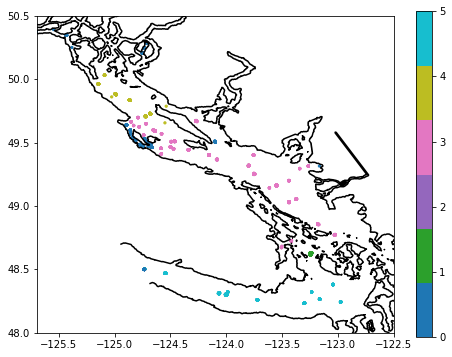

In [24]:
### map clusters
fig, ax = plt.subplots(figsize = (8,6))
viz_tools.set_aspect(ax, coords = 'map')
m=ax.scatter(data['Lon'], data['Lat'],c=data['Cluster'],s=5,cmap=plt.get_cmap('tab10',6))
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
plt.colorbar(m)
ax.set_ylim(48, 50.5)
ax.set_xlim(-125.7, -122.5);

In [25]:
## Plot residuals by year day for each cluster

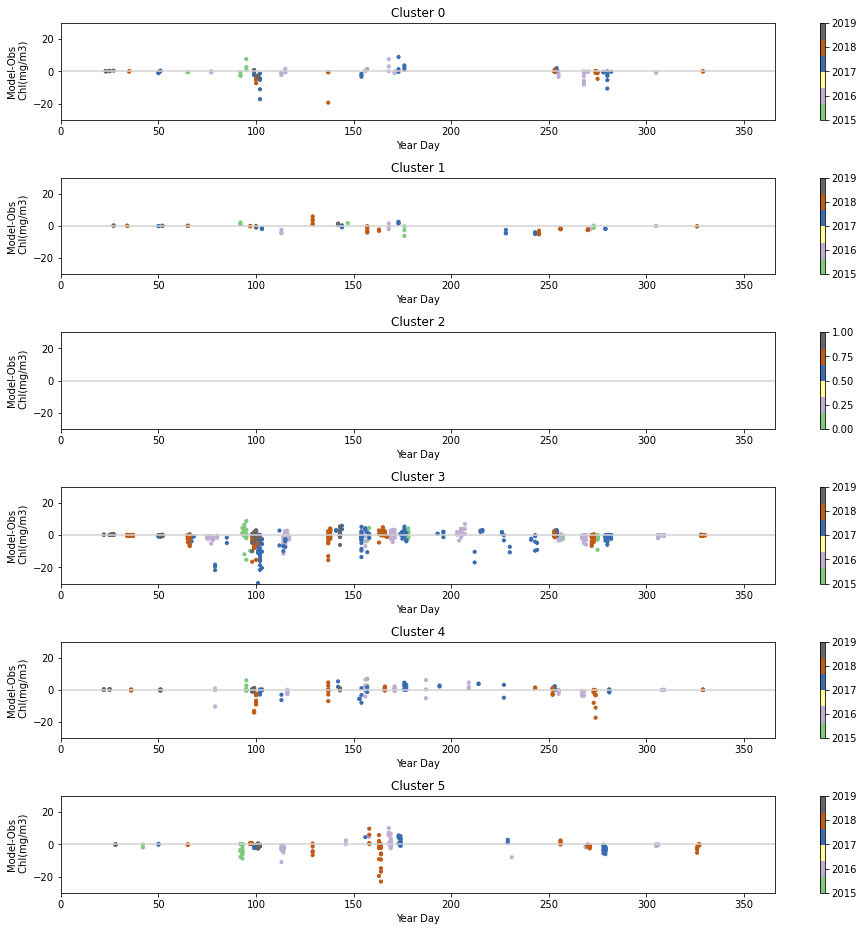

In [29]:
fig,ax=plt.subplots(6,1,figsize=(16,16))
fig.subplots_adjust(hspace=.6)
for icl in range(0,6):
    icld=data.loc[data.Cluster==icl]
    ix=ax[icl]
    m=ix.scatter(icld['YD'],icld['mod_Chl']-icld['Chl'],c=icld['Year'],s=10,cmap=plt.get_cmap('Accent',6))
    ix.set_xlabel('Year Day')
    ix.set_ylabel('Model-Obs\n Chl(mg/m3)')
    ix.set_xlim(0,366)
    ix.set_ylim(-30,30)
    ix.set_title(f'Cluster {icl}')
    fig.colorbar(m,ax=ix)
    ix.plot((0,366),(0,0),'-',color='lightgray')

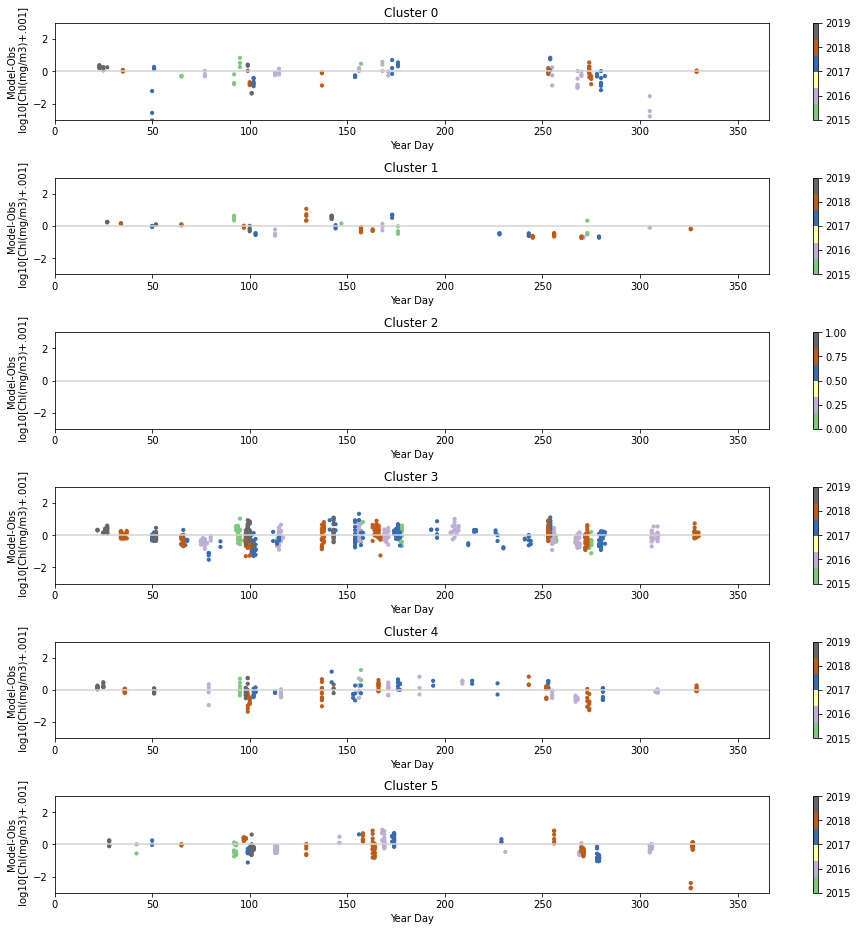

In [30]:
fig,ax=plt.subplots(6,1,figsize=(16,16))
fig.subplots_adjust(hspace=.6)
for icl in range(0,6):
    icld=data.loc[data.Cluster==icl]
    ix=ax[icl]
    m=ix.scatter(icld['YD'],icld['l10_modChl']-icld['l10_obsChl'],c=icld['Year'],s=10,cmap=plt.get_cmap('Accent',6))
    ix.set_xlabel('Year Day')
    ix.set_ylabel('Model-Obs\n log10[Chl(mg/m3)+.001]')
    ix.set_xlim(0,366)
    ix.set_ylim(-3,3)
    ix.set_title(f'Cluster {icl}')
    fig.colorbar(m,ax=ix)
    ix.plot((0,366),(0,0),'-',color='lightgray')